In [1]:
import zipfile
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns

np.random.seed(42)
%matplotlib inline

In [2]:
# crop if needed
def center_crop(image_path, size):
  """
  crop the image from center of the given size
  input:
    image_path (string): Path of image
    size (int): size to which the image being cropped from center
  """
  img = Image.open(image_path)
  img = img.resize((size+1,size+1))
  x_center = img.width/2
  y_center = img.height/2
  size = size/2
  cr = img.crop((x_center-size, y_center-size, x_center+size, y_center+size))

  return cr

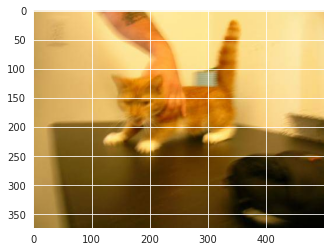

In [3]:
img = Image.open("Cat_Dog_data/train/cat/cat.0.jpg")
img.format, type(img)
plt.imshow(img)

In [4]:
# get cat and dog list
cat_list = os.listdir("Cat_Dog_data/train/cat")
dog_list = os.listdir("Cat_Dog_data/train/dog")

# shorten them if needed
shortTrainNum = 5000
cat_list = cat_list[:shortTrainNum]
dog_list = dog_list[:shortTrainNum]

# make training list, combine them, and shuffle them
train_list = []
train_list.extend(cat_list)
train_list.extend(dog_list)
np.random.shuffle(train_list)

In [5]:
print(train_list[:10])
print(len(cat_list), len(dog_list))

['dog.9575.jpg', 'cat.4966.jpg', 'cat.6544.jpg', 'cat.502.jpg', 'cat.2537.jpg', 'dog.4898.jpg', 'cat.9248.jpg', 'dog.2195.jpg', 'dog.5465.jpg', 'cat.2499.jpg']
5000 5000


In [ ]:
# create 100*100 array
train_data = np.zeros((10000, 100 * 100 * 3))

# crop image, flatten, and store
for i, image_name in enumerate(train_list):
  if image_name.split(".")[0] == "dog":
    path =  "Cat_Dog_data/train/dog"
  else:
    path =  "Cat_Dog_data/train/cat"
  image_path = f'{path}/{image_name}'
  crp_img = center_crop(image_path,100)
  crp_arr = np.array(crp_img).reshape(-1)
  train_data[i] = crp_arr

  # normalize between 0-1
  train_data = train_data/255

In [ ]:
# check if successful
train_data[0]

In [ ]:
# get labels and store
# cat: 0
# dog: 1

train_labels = np.array([0 if name.split(".")[0]=="cat" else 1 for name in train_list])

In [ ]:
# use sklean to grab log reg model

model = LogisticRegression(max_iter=100, n_jobs=-1)